In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Salary_Data.csv')

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dataset.shape

(30, 2)

In [5]:
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [6]:
dataset.head()

,YearsExperience,Salary
0,6.8,91738.0
1,4.0,56957.0
2,8.2,113812.0
3,4.0,55794.0
4,5.9,81363.0


In [7]:
x=dataset.YearsExperience
y=dataset.Salary

In [8]:
x[0:8]

0    6.8
1    4.0
2    8.2
3    4.0
4    5.9
5    9.6
6    2.0
7    1.3
Name: YearsExperience, dtype: float64

In [9]:
xsize=x.shape[0]
ysize=y.shape[0]

In [10]:
#spliting the data into train and test
def splits():
    split=float(input('Enter train split size(0-1)'))
    a=int(xsize*split)
    b=int(ysize*split)
    print('Training size is ',a)
    xtrain=np.array(x[0:a])
    ytrain=np.array(y[0:a])
    xtest=np.array(x[a:])
    ytest=np.array(y[a:])
    return xtrain,ytrain,xtest,ytest

    

In [11]:
xtrain,ytrain,xtest,ytest=splits()

Enter train split size(0-1)0.8
Training size is  24


In [12]:
xtrain

array([ 6.8,  4. ,  8.2,  4. ,  5.9,  9.6,  2. ,  1.3, 10.5,  4.9,  5.1,
        3.7, 10.3,  6. ,  9.5,  1.1,  3.9,  2.2,  4.5,  5.3,  7.9,  2.9,
        7.1,  3.2])

In [13]:
ytrain

array([ 91738.,  56957., 113812.,  55794.,  81363., 112635.,  43525.,
        46205., 121872.,  67938.,  66029.,  57189., 122391.,  93940.,
       116969.,  39343.,  63218.,  39891.,  61111.,  83088., 101302.,
        56642.,  98273.,  54445.])

## Model

In [37]:
xtrainmean=xtrain.mean()
ytrainmean=ytrain.mean()
xtestmean=xtest.mean()
ytestmean=ytest.mean()

In [38]:
xtrainmean

5.4125000000000005

In [39]:
ytrainmean

76902.91666666667

In [40]:
#model
def model():
    num=0
    dem=0
    for i in range(len(xtrain)):
        num+=(xtrain[i]-xtrainmean)*(ytrain[i]-ytrainmean)
        dem+=(xtrain[i]-xtrainmean)**2
    b=num/dem
    a=ytrainmean-(b*xtrainmean)
    return b,a

In [41]:
b,a=model()
b


9607.618558184471

In [42]:
a

24901.681220493214

In [43]:
ypred = b*xtrain + a

In [44]:
ypred

array([ 90233.48741615,  63332.15545323, 103684.15339761,  63332.15545323,
        81586.63071378, 117134.81937906,  44116.91833686,  37391.58534613,
       125781.67608143,  71979.0121556 ,  73900.53586723,  60449.86988578,
       123860.15236979,  82547.3925696 , 116174.05752325,  35470.0616345 ,
        62371.39359741,  46038.4420485 ,  68135.96473232,  75822.05957887,
       100801.86783015,  52763.77503923,  93115.7729836 ,  55646.06060668])

In [45]:
# training accuracy
u=((ytrain - ypred) ** 2).sum()
v=((ytrain - ytrainmean) ** 2).sum()
r=1-(u/v)
r

0.9581006766257416

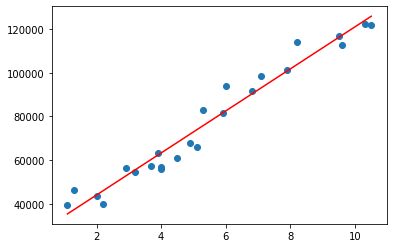

In [46]:
#training set

plt.scatter(xtrain, ytrain)
plt.plot([min(xtrain), max(xtrain)], [min(ypred), max(ypred)], color='red')

plt.show()

In [48]:
# testing accuracy
#ypred = b*xtest+ a
u=((ytest - ypred) ** 2).sum()
v=((ytest - ytestmean) ** 2).sum()
r=1-(u/v)
r

0.9496358643787162

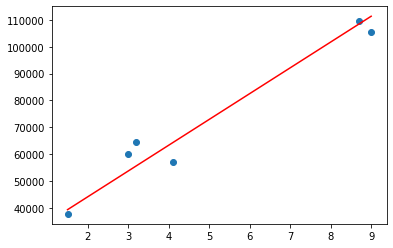

In [49]:
#test set
plt.scatter(xtest, ytest)
plt.plot([min(xtest), max(xtest)], [min(ypred), max(ypred)], color='red')

plt.show()